<a href="https://colab.research.google.com/github/datascience-uniandes/classification-tutorial/blob/master/rrhh.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predict if a employee will left the company

MINE-4101: Applied Data Science  
Univerisdad de los Andes  
  
Last update: October, 2022

In [1]:
import pandas as pd

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
%matplotlib inline

### Reading the dataset

In [2]:
rrhh_df = pd.read_csv('./data/rrhh.csv', sep = ',')

In [3]:
rrhh_df.rename(columns = {'sales' : 'department'}, inplace = True)

In [4]:
rrhh_df.shape

(14999, 10)

In [5]:
rrhh_df.dtypes

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
department                object
salary                    object
dtype: object

In [6]:
rrhh_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [7]:
rrhh_df['left'].value_counts(dropna = False, normalize = True)

0    0.761917
1    0.238083
Name: left, dtype: float64

### Splitting train and test datasets

In [8]:
features = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'promotion_last_5years']

In [9]:
X = rrhh_df[features]

In [10]:
Y = rrhh_df['left']

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 100)

In [12]:
Y_train.value_counts(normalize = True)

0    0.761897
1    0.238103
Name: left, dtype: float64

In [13]:
Y_test.value_counts(normalize = True)

0    0.762
1    0.238
Name: left, dtype: float64

### Training the model

In [14]:
model = DecisionTreeClassifier(max_depth = 4, criterion = 'entropy', random_state = 200)

In [15]:
model.fit(X_train, Y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=200)

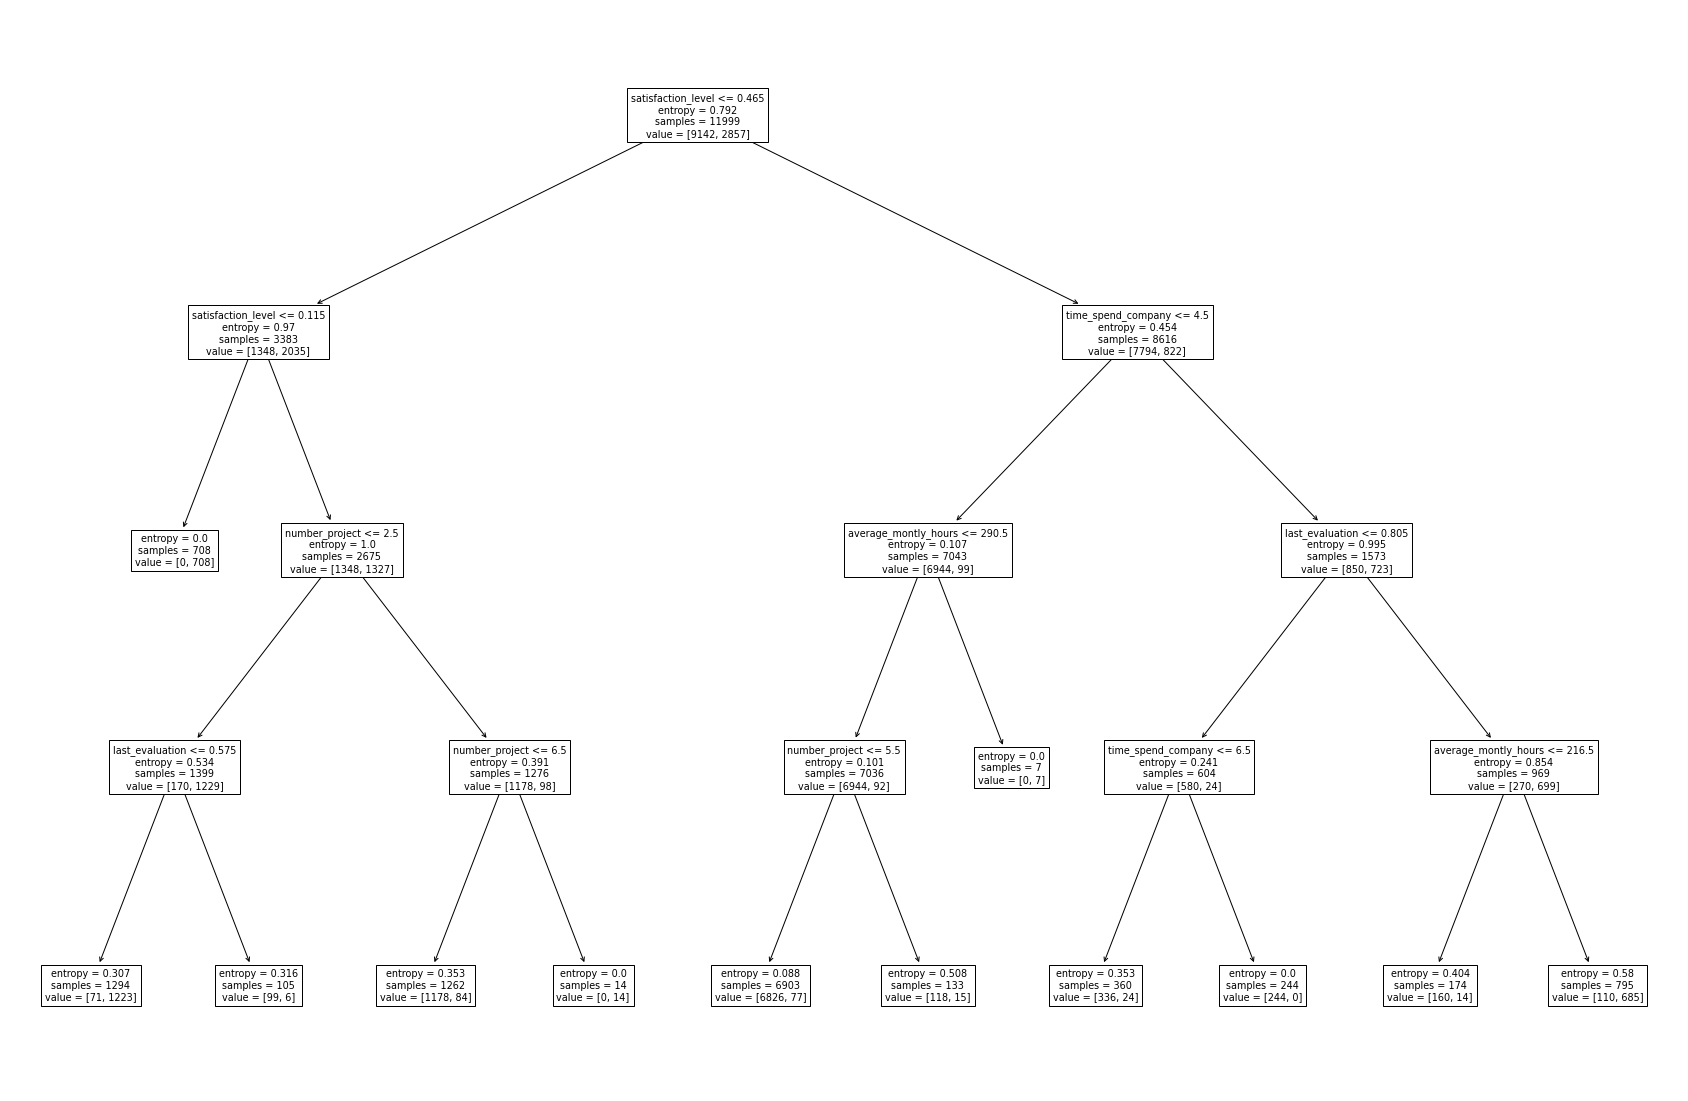

In [16]:
plt.figure(figsize = (30, 20))
plot_tree(model, feature_names = model.feature_names_in_)
plt.show()

### Evaluating the model

In [17]:
predictions = model.predict(X_test)

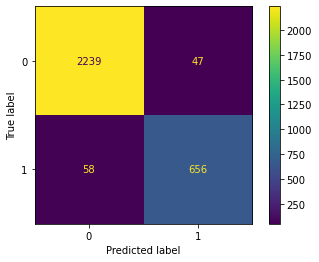

In [18]:
ConfusionMatrixDisplay.from_predictions(Y_test, predictions)

In [19]:
print('Precision:', precision_score(Y_test, predictions))
print('Recall:', recall_score(Y_test, predictions))
print('F1:', f1_score(Y_test, predictions))

Precision: 0.9331436699857752
Recall: 0.9187675070028011
F1: 0.9258997882851093


### Showing class distributions among features

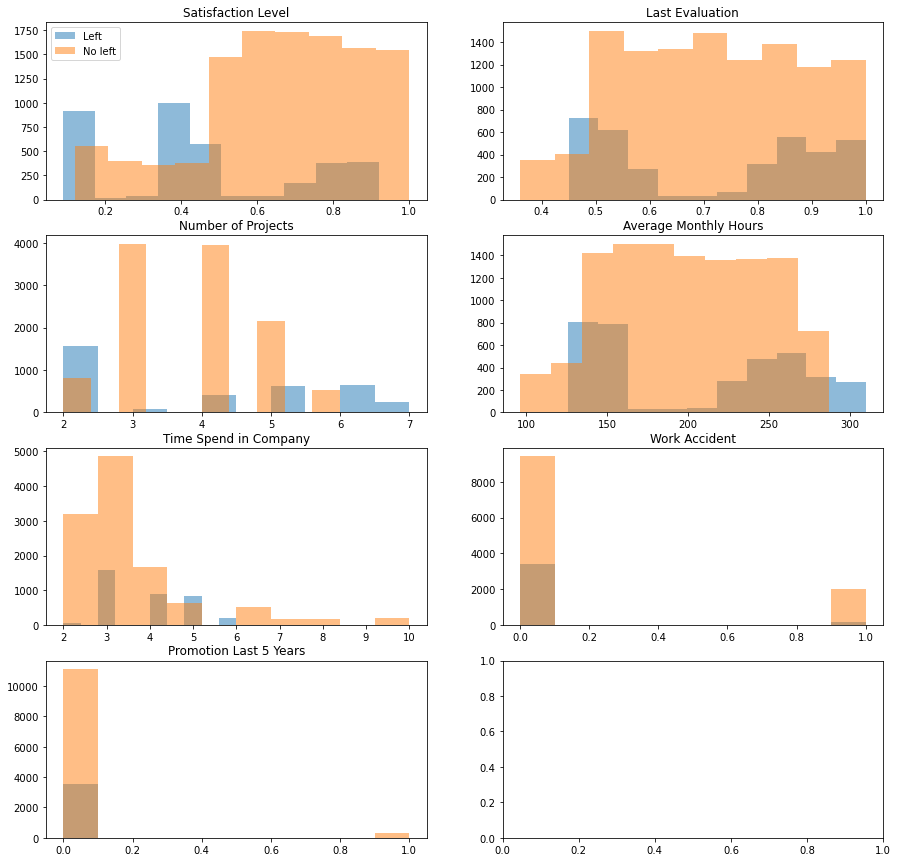

In [20]:
fig, axes = plt.subplots(nrows = 4, ncols = 2, figsize = (15, 15))
ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7 = axes.flatten()

ax0.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'satisfaction_level' ], label = 'Left', alpha = 0.5)
ax0.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'satisfaction_level' ], label = 'No left', alpha = 0.5)
ax0.set_title('Satisfaction Level')
ax0.legend()

ax1.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'last_evaluation' ], label = 'Left', alpha = 0.5)
ax1.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'last_evaluation' ], label = 'No left', alpha = 0.5)
ax1.set_title('Last Evaluation')

ax2.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'number_project' ], label = 'Left', alpha = 0.5)
ax2.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'number_project' ], label = 'No left', alpha = 0.5)
ax2.set_title('Number of Projects')

ax3.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'average_montly_hours' ], label = 'Left', alpha = 0.5)
ax3.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'average_montly_hours' ], label = 'No left', alpha = 0.5)
ax3.set_title('Average Monthly Hours')

ax4.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'time_spend_company' ], label = 'Left', alpha = 0.5)
ax4.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'time_spend_company' ], label = 'No left', alpha = 0.5)
ax4.set_title('Time Spend in Company')

ax5.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'Work_accident' ], label = 'Left', alpha = 0.5)
ax5.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'Work_accident' ], label = 'No left', alpha = 0.5)
ax5.set_title('Work Accident')

ax6.hist(rrhh_df.loc[rrhh_df['left'] == 1, 'promotion_last_5years' ], label = 'Left', alpha = 0.5)
ax6.hist(rrhh_df.loc[rrhh_df['left'] == 0, 'promotion_last_5years' ], label = 'No left', alpha = 0.5)
ax6.set_title('Promotion Last 5 Years')

plt.show()

### TODO:

What is the effect to add the categorical features (department, salary)? How much performance metrics will be improved?